In [36]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd



In [37]:
# Data Setup
trainData = pd.read_csv('./dataset/cases_2021_train.csv')
testData = pd.read_csv('./dataset/cases_2021_test.csv')
location = pd.read_csv('./dataset/location_2021.csv')
#https://github.com/samayo/country-json/blob/master/src/country-by-continent.json
countryMap = pd.read_json('./dataset/countryMap.json')


In [38]:
# Globals
fullSet = pd.concat([trainData,testData], ignore_index=True)
fullSet = pd.merge(fullSet, countryMap, on='country', how='left')
countrySet = fullSet.groupby("country")
fullSet = fullSet.groupby("continent")
results = {}
# This is a pre-config for the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\trist\AppData\Local\Temp\ipykernel_14376\4008181475.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [39]:
# HELPERS

# Helper function, this is what is counting and calculating data that is currently present
def parsePercentages(group):
    counts = {}
    for column in group.columns:
        counts[column] = group[column].count()
    percentages = {field: (count /  len(group)) * 100 for field, count in counts.items()}
    total_percent = sum(percentages.values()) / 11
    return counts, percentages, total_percent

# Helper function to create heat maps, if you want to change something about the heat maps do it here
def createHeatMap(world, column, title, filename):
    fig, ax = plt.subplots()
    world.plot(column=column, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    ax.axis('off')
    ax.set_title(title, fontdict={'fontsize': '18', 'fontweight' : '3'})
    plt.show()


In [40]:
# Continent Logic
for country, group in fullSet:
    counts, percentages, total_percent = parsePercentages(group)
    results[country] = {
        "DataSize": len(group), # total data size per country
        "counts":counts, # counts data that exists vs what does not exist
        "percentages":percentages, # calculates percentage of data that is avaialable for each category
        "overall data": total_percent # calculates an overall "percent" of data that is present
    }

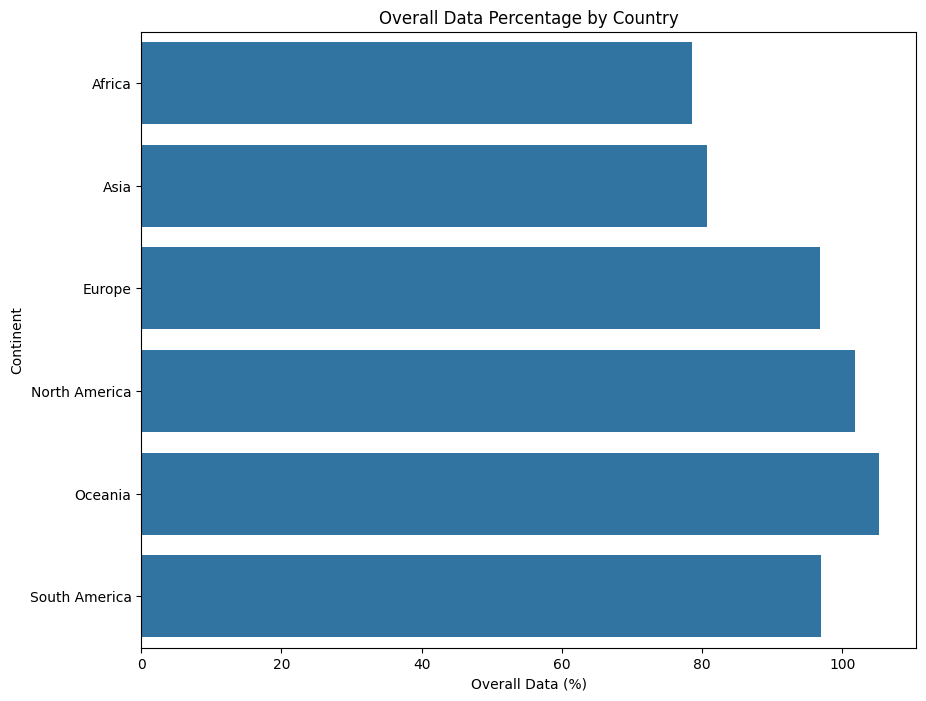

In [41]:
# Convert to data frame to work with data properly, need to use Transpose to set country as col. 
barResults = pd.DataFrame(results).T
# For bar plot of continents
plt.figure(figsize=(10, 8))
sns.barplot(x=barResults['overall data'], y=barResults.index)
plt.xlabel('Overall Data (%)')
plt.ylabel('Continent')
plt.title('Overall Data Percentage by Country')
plt.show()

In [42]:
for country, group in countrySet:
    counts, percentages, total_percent = parsePercentages(group)
    country_index = world.index[world['name'] == country].tolist()
    if country_index:
        world.at[country_index[0], 'overallPercent'] = total_percent
        world.at[country_index[0], 'agePercent'] = percentages['age']
        world.at[country_index[0], 'sexPercent'] = percentages['sex']
        world.at[country_index[0], 'outcome'] = percentages['outcome']
# Lots of countries missing, need to fill them with something otherwise they just dont appear on maps
world['overallPercent'].fillna(0, inplace=True)
world['agePercent'].fillna(0, inplace=True)
world['sexPercent'].fillna(0, inplace=True)
world['outcome'].fillna(0, inplace=True)

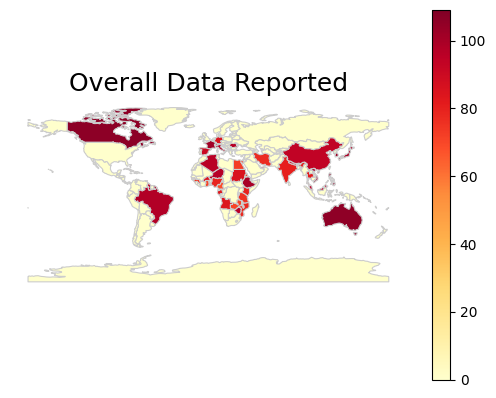

In [43]:
# Heatmaps
createHeatMap(world, 'overallPercent', 'Overall Data Reported', 'Overall.svg')

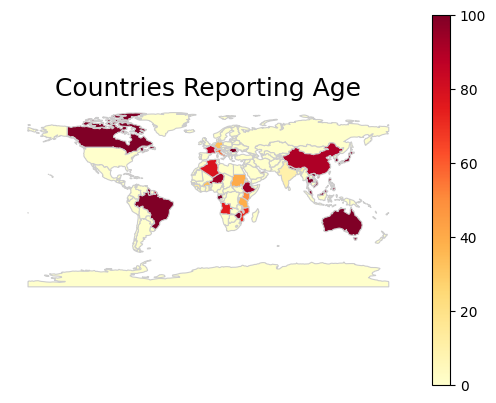

In [44]:
createHeatMap(world, 'agePercent', 'Countries Reporting Age', 'Countries.svg')


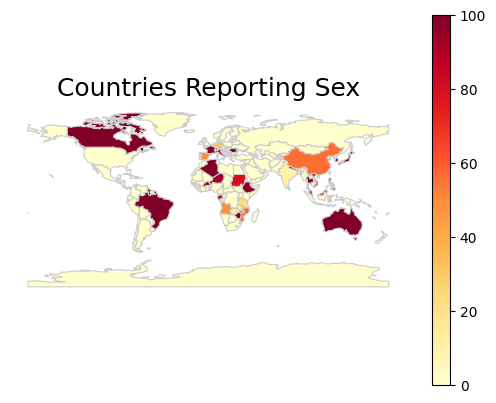

In [45]:
createHeatMap(world, 'sexPercent', 'Countries Reporting Sex', 'Sex.svg')

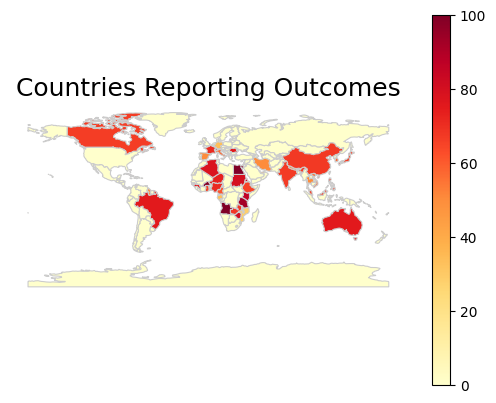

In [46]:
createHeatMap(world, 'outcome', 'Countries Reporting Outcomes', 'Outcome.svg')

In [47]:
import pandas as pd
import numpy as np
# EXCEL - DF CSV CONVERSION
# trainData = pd.read_excel('dataset/cases_2021_train_processed_2.xlsx', sheet_name=None)
trainfile = pd.read_excel ('dataset/cases_2021_train_processed_2.xlsx') 
testfile = pd.read_excel ('dataset/cases_2021_test_processed_unlabelled_2.xlsx') 
# Write the dataframe object into csv file 
trainfile.to_csv ('dataset/Train.csv',  
                  index = None, 
                  header=True)
testfile.to_csv ('dataset/Test.csv',  
                  index = None, 
                  header=True) 

In [48]:
import pandas as pd
import numpy as np

# FEATURE MAPPING
# read csv file and convert into a dataframe object 
trainData = pd.DataFrame(pd.read_csv('dataset/Train.csv')) 
testData = pd.DataFrame(pd.read_csv('dataset/Test.csv')) 
# map function
def mapFeatures(df):
    # Map 'sex' to binary values
    sex_mapping = {"male": 0, "female": 1}
    df["sex"] = df["sex"].map(sex_mapping)

    # Map 'province' to numbers from 0 
    province_mapping = {province: idx for idx, province in enumerate(df['province'].unique())}
    df['province'] = df['province'].map(province_mapping)
    
    # Map chronic disease
    cdb_mapping = {False: 0, True: 1}
    df['chronic_disease_binary'] = df['chronic_disease_binary'].map(cdb_mapping)
    
    # map countries
    country_mapping = {country: idx for idx, country in enumerate(df['country'].unique())}
    df['country'] = df['country'].map(country_mapping)
    
mapFeatures(trainData)
mapFeatures(testData)
# Map outcome group for train data
og_mapping = {"deceased": 0,"hospitalized": 1,"nonhospitalized":2}
trainData['outcome_group'] = trainData['outcome_group'].map(og_mapping)
#print(trainData.head(10))
print(testData.head(10))

   age  sex  province  country  latitude  longitude date_confirmation  \
0   59    1         0        0  14.59580  120.97720        2020-03-31   
1   79    0         1        1  11.13927   79.08428        2020-05-24   
2   44    1         1        1  13.08362   80.28252        2020-05-19   
3   36    0         1        1  13.12462   79.91815        2020-04-30   
4   52    0         2        1  25.31258   86.48888        2020-04-24   
5   28    1         1        1  12.68224   79.98008        2020-05-31   
6   17    0         2        1  25.73271   86.98845        2020-05-23   
7   18    0         3        1  13.00287   76.10245        2020-05-24   
8   68    0         0        0  14.63000  121.03000        2020-04-11   
9   21    0         1        1  13.08362   80.28252        2020-05-15   

   chronic_disease_binary  Confirmed  Deaths  Recovered  Active  \
0                       0     747288   13297     603746  130245   
1                       0     886673   12719     858075   1587